In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import seaborn as sns

In [2]:
#import data
df = pd.read_csv('gold_price_data.csv')
df.head()

,Date,Value
0,1/1/1970,35.2
1,4/1/1970,35.1
2,7/1/1970,35.4
3,10/1/1970,36.2
4,1/1/1971,37.4


In [3]:
#datetime & make index
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [4]:
df.tail()

,Value
Date,
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75
2020-03-12,1570.70
2020-03-13,1562.80


In [5]:
#describe the data to see summary statistics
df.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [6]:
#check for missing values
df.isna().sum()

Value    0
dtype: int64

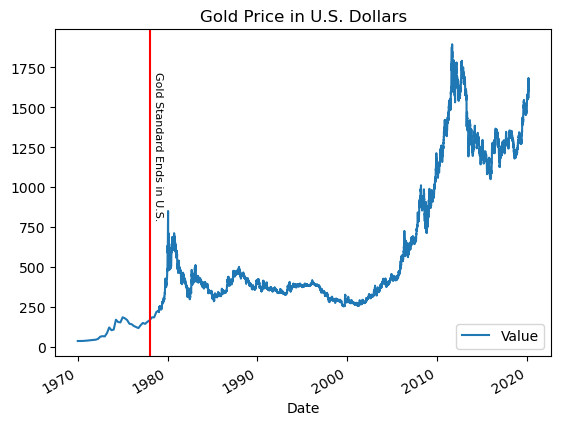

In [7]:
#visualize data as a line chart
df.plot()
plt.title("Gold Price in U.S. Dollars")
plt.axvline(x='01-01-1978', c='r')
plt.text("06-01-1978", 800, "Gold Standard Ends in U.S.", size=8, rotation=270)
plt.show()

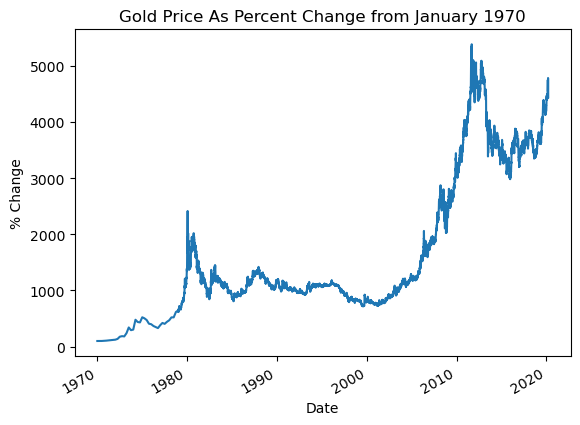

In [8]:
#visualize growth as a line chart
first_price = df.Value.iloc[0]
change = df.Value.div(first_price).mul(100)
change.plot()
plt.title("Gold Price As Percent Change from January 1970")
plt.ylabel('% Change')
plt.show()

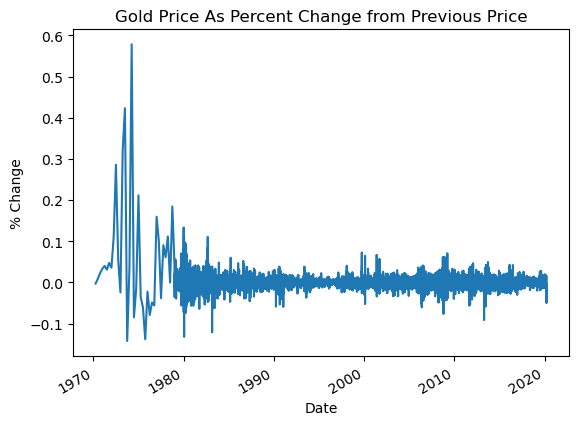

In [9]:
#Percent Change from Previous Price
df['Percent Change'] = df["Value"].pct_change()
df['Percent Change'].plot()
plt.title("Gold Price As Percent Change from Previous Price")
plt.ylabel('% Change')
plt.show()

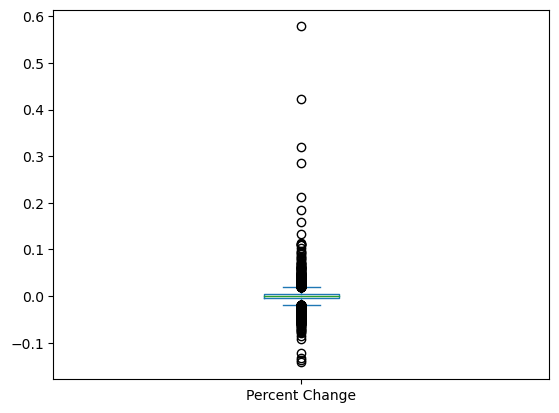

In [10]:
#Percent Change Outliers
df['Percent Change'].plot(kind='box')
plt.show()

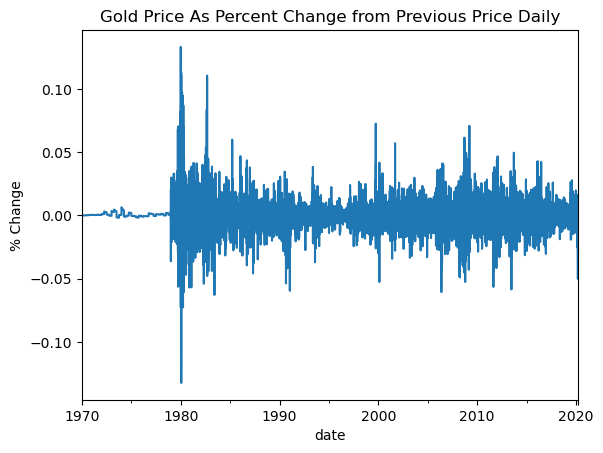

In [11]:
#interpolate to make daily values for whole set (upsample for early data since much of the fluctuation is early in the data)
df_daily = df.reindex(pd.date_range(pd.to_datetime('1970-01-01'), pd.to_datetime('2020-03-13'), name='date'))
df_daily['Value'] = df_daily['Value'].interpolate()
df_daily['Percent Change'] = df_daily["Value"].pct_change()
df_daily['Percent Change'].plot()
plt.title("Gold Price As Percent Change from Previous Price Daily")
plt.ylabel('% Change')
plt.show()

In [12]:
df_daily.head()

,Value,Percent Change
date,,
1970-01-01,35.200000,NaN
1970-01-02,35.198889,-0.000032
1970-01-03,35.197778,-0.000032
1970-01-04,35.196667,-0.000032
1970-01-05,35.195556,-0.000032


In [13]:
df_daily.tail()

,Value,Percent Change
date,,
2020-03-09,1672.50,-0.002217
2020-03-10,1655.70,-0.010045
2020-03-11,1653.75,-0.001178
2020-03-12,1570.70,-0.050219
2020-03-13,1562.80,-0.005030


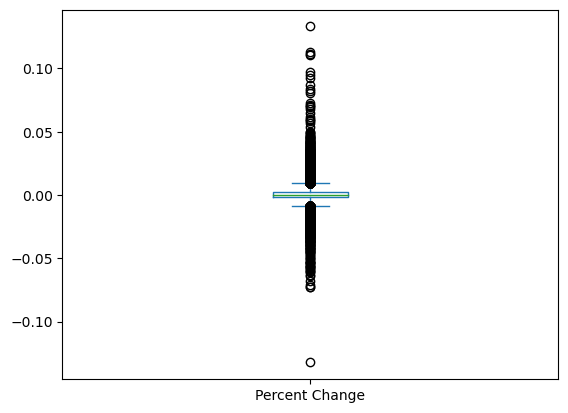

In [14]:
df_daily['Percent Change'].plot(kind='box')
plt.show()

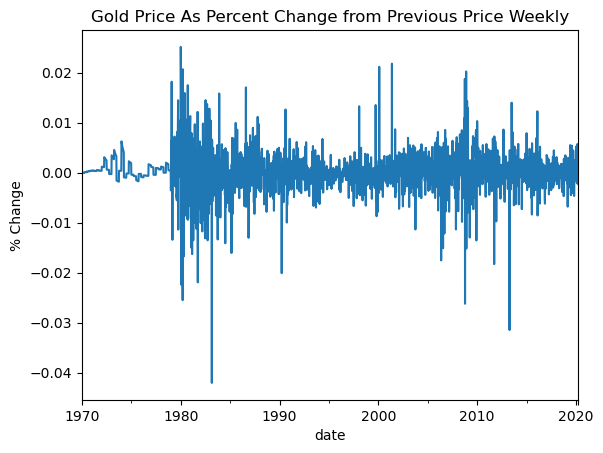

In [15]:
#interpolate to make weekly values for whole set (downsample the last set)
df_weekly = df_daily.resample("W").mean()
df_weekly['Percent Change'] = df_daily["Value"].pct_change()
df_weekly['Percent Change'].plot()
plt.title("Gold Price As Percent Change from Previous Price Weekly")
plt.ylabel('% Change')
plt.show()

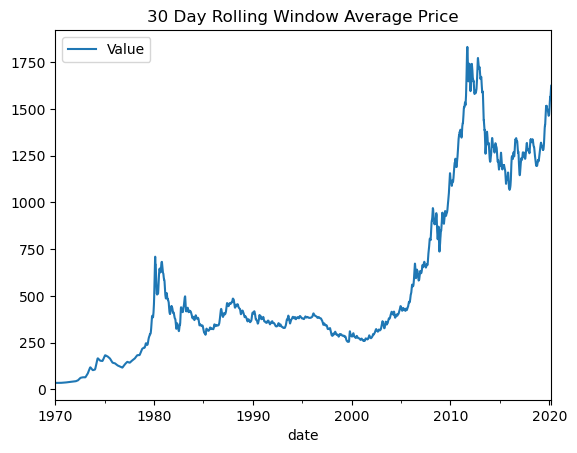

In [16]:
#Rolling Window Monthly Graphed
R30 = df_daily.rolling(window='30D').mean()
R30 = R30.drop(columns='Percent Change')
R30.plot()
plt.title("30 Day Rolling Window Average Price")
plt.show()

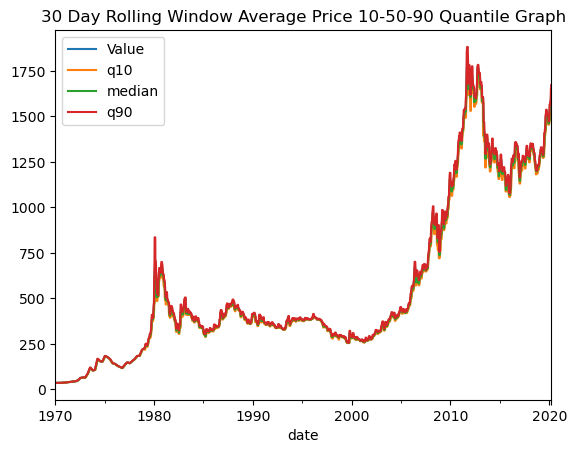

In [17]:
#Rolling Window Graph of Q10, Median & Q90 for Monthly Data
R30['q10'] = df_daily.Value.rolling('30D').quantile(0.1)
R30['median'] = df_daily.Value.rolling('30D').quantile(0.5)
R30['q90'] = df_daily.Value.rolling('30D').quantile(0.9)
R30.plot()
plt.title("30 Day Rolling Window Average Price 10-50-90 Quantile Graph")
plt.show()

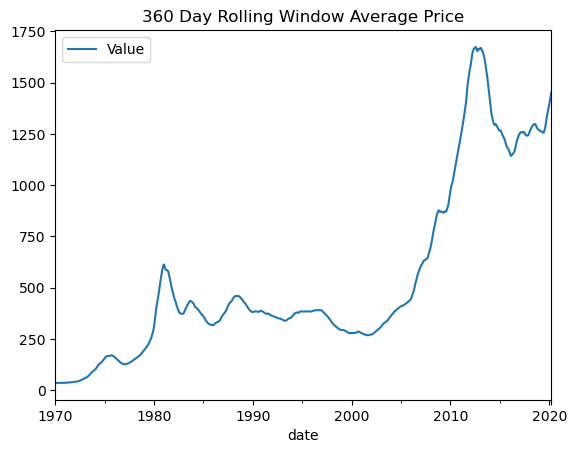

In [18]:
#Rolling Window Yearly
R360 = df_daily.rolling(window='360D').mean()
R360 = R360.drop(columns='Percent Change')
R360.plot()
plt.title("360 Day Rolling Window Average Price")
plt.show()

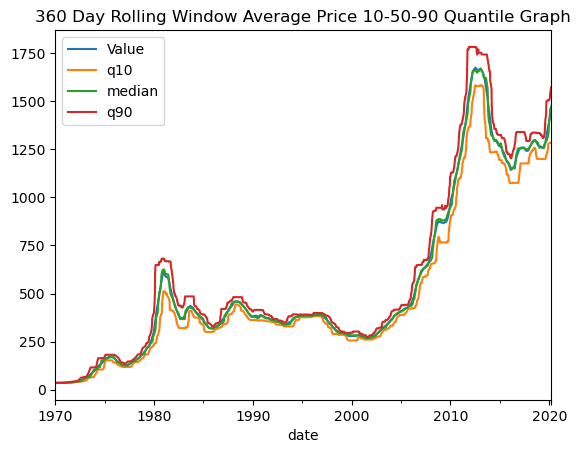

In [19]:
#Rolling Window Graph of Q10, Median & Q90 for Yearly Data
R360['q10'] = df_daily.Value.rolling('360D').quantile(0.1)
R360['median'] = df_daily.Value.rolling('360D').quantile(0.5)
R360['q90'] = df_daily.Value.rolling('360D').quantile(0.9)
R360.plot()
plt.title("360 Day Rolling Window Average Price 10-50-90 Quantile Graph")
plt.show()

In [20]:
#lag correlation weekly
df_daily['wk_shift'] = df_daily['Value'].shift(7)
corr_wk = df_daily['Value'].corr(df_daily['wk_shift'])
corr_wk

0.9992010475459245

In [21]:
#lag correlation monthly
df_daily['mth_shift'] = df_daily['Value'].shift(30)
corr_mth = df_daily['Value'].corr(df_daily['mth_shift'])
corr_mth

0.9966728038732906

In [22]:
#lag correlation quarterly
df_daily['qtr_shift'] = df_daily['Value'].shift(90)
corr_qtr = df_daily['Value'].corr(df_daily['qtr_shift'])
corr_qtr

0.991089850839611

In [23]:
#lag correlation yearly
df_daily['yr_shift'] = df_daily['Value'].shift(360)
corr_yr = df_daily['Value'].corr(df_daily['yr_shift'])
corr_yr

0.9613670161199683

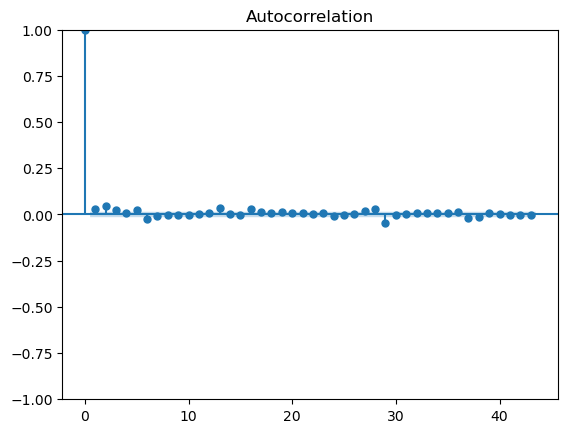

In [24]:
#Check Autocorrelation
df_daily = df_daily.dropna()
fig = tsaplots.plot_acf(df_daily['Percent Change'])

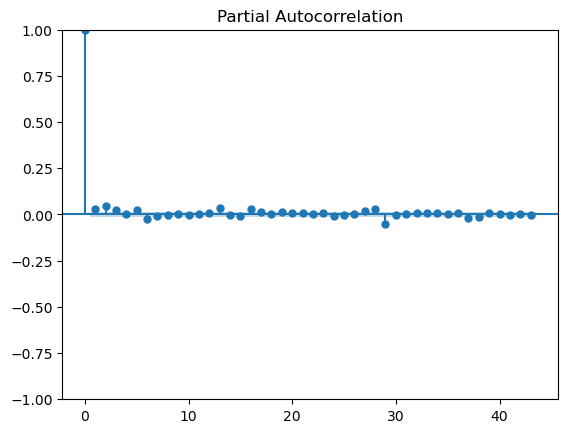

In [25]:
#PACF
fig = tsaplots.plot_pacf(df_daily['Percent Change'])

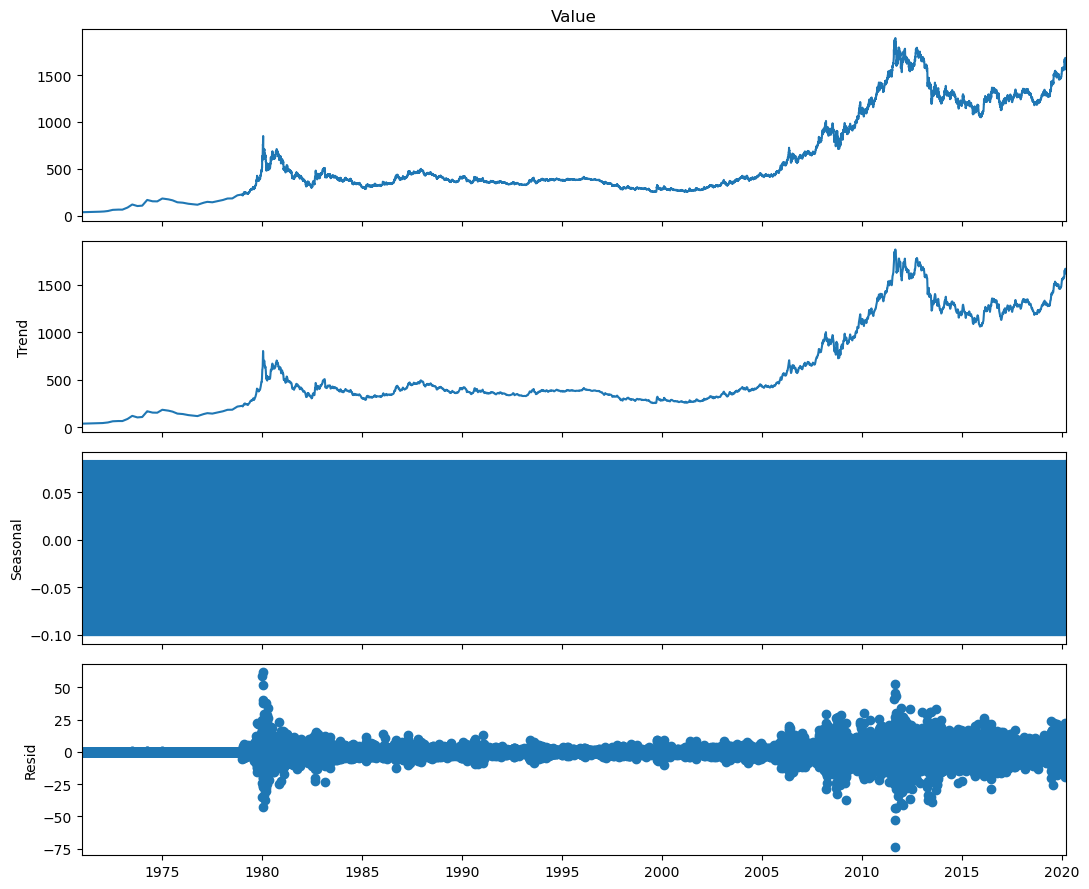

In [26]:
#Check Seasonality on Daily Data
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_daily['Value'], period=None)
Fig = decomposition.plot()

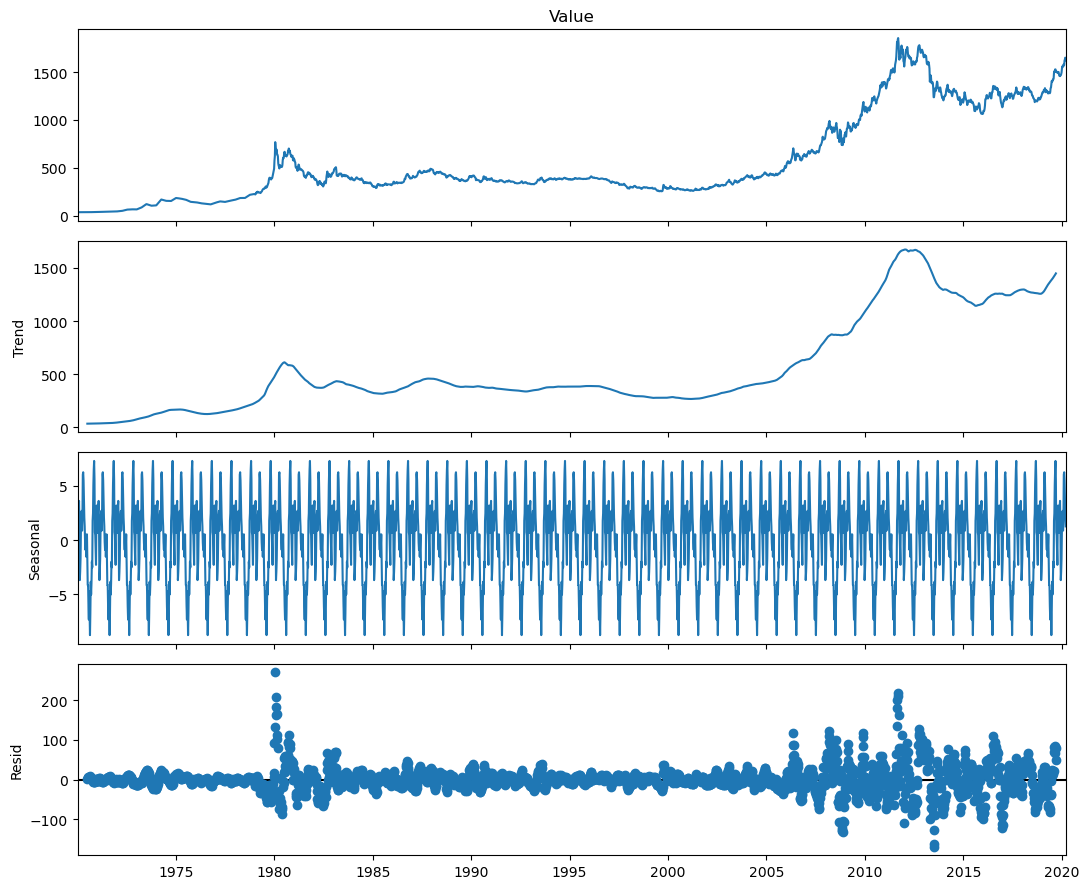

In [27]:
#Check Seasonality on Weekly Data
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_weekly['Value'], period=None)
Fig = decomposition.plot()